In [2]:
import warnings
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.legend_handler import HandlerBase
import seaborn as sns
%matplotlib inline

In [9]:
# Display the dataframe
pd.set_option('display.max_columns', 100)  # or 1000
pd.set_option('display.max_rows', 100)  # or 1000
pd.set_option('display.max_colwidth', 100)  # or 199

In [4]:
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/housing-data.csv")
train, test = train_test_split(df, test_size=0.20, random_state = 42)
train.to_csv("data/train.csv")
test.to_csv("data/test.csv")

In [7]:
train.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [10]:
print ("Train: ",train.shape[0],"data points, and ",train.shape[1],"features")
print ("Test: ",test.shape[0],"data points, and ",test.shape[1],"features")

Train:  2109 data points, and  82 features
Test:  528 data points, and  82 features


In [11]:
train.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2325,2595,535355100,50,RL,50.0,7000,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,6,6,1924,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,Fa,TA,No,LwQ,617.0,Unf,0.0,0.0,617.0,GasA,Gd,Y,SBrkr,865,445,0,1310,0.0,0.0,2,0,2,1,TA,6,Min1,0,NaN,Attchd,1924.0,Unf,1.0,398.0,TA,TA,Y,0,0,126,0,0,0,NaN,NaN,NaN,0,5,2006,COD,Normal,112000
1567,1754,528275035,60,RL,NaN,8063,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,924.0,924.0,GasA,Ex,Y,SBrkr,948,742,0,1690,0.0,0.0,2,1,3,1,TA,7,Typ,1,TA,Attchd,2000.0,RFn,2.0,463.0,TA,TA,Y,100,48,0,0,0,0,NaN,NaN,NaN,0,11,2007,WD,Abnorml,181000
1189,1325,902406090,50,RM,81.0,12150,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1.5Fin,5,5,1954,1954,Gable,CompShg,MetalSd,MetalSd,BrkFace,335.0,TA,TA,BrkTil,TA,TA,No,Unf,0.0,Unf,0.0,1050.0,1050.0,GasA,Ex,N,FuseF,1050,745,0,1795,0.0,0.0,2,0,4,1,TA,7,Typ,0,NaN,Attchd,1954.0,Unf,1.0,352.0,Fa,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,Normal,131500
1359,1518,909175050,75,RL,60.0,8400,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378.0,Unf,0.0,342.0,720.0,GasA,Ex,Y,SBrkr,1052,720,420,2192,0.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1.0,240.0,TA,TA,Y,262,24,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,179500
567,637,535178040,20,RL,70.0,8750,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1956,1956,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,435.0,BLQ,202.0,565.0,1202.0,GasA,TA,Y,SBrkr,1202,0,0,1202,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1956.0,RFn,1.0,304.0,TA,TA,Y,0,35,120,0,0,0,NaN,GdWo,NaN,0,11,2009,COD,Abnorml,120000


In [13]:
numericals = [f for f in train.columns if train.dtypes[f] != 'object']
numericals.remove('SalePrice')
numericals.remove('PID')
categoricals = [f for f in train.columns if train.dtypes[f] == 'object']

In [14]:
numericals

['Order',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold']

In [15]:
categoricals

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

Text(0.5, 1.0, 'Sale Price')

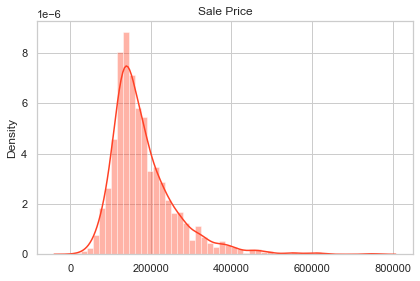

In [17]:
# Target variable: SalePrice
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)
sns.distplot(a=train['SalePrice'],color='#ff4125',axlabel=False).set_title('Sale Price')

In [18]:
def plot_numericals(feature):
    fig, axes= plt.subplots(1,2)
    sns.boxplot(data=df, x=feature, ax=axes[0])
    sns.distplot(a=df[feature], ax=axes[1], color='#ff4125')
    fig.set_size_inches(15,5)

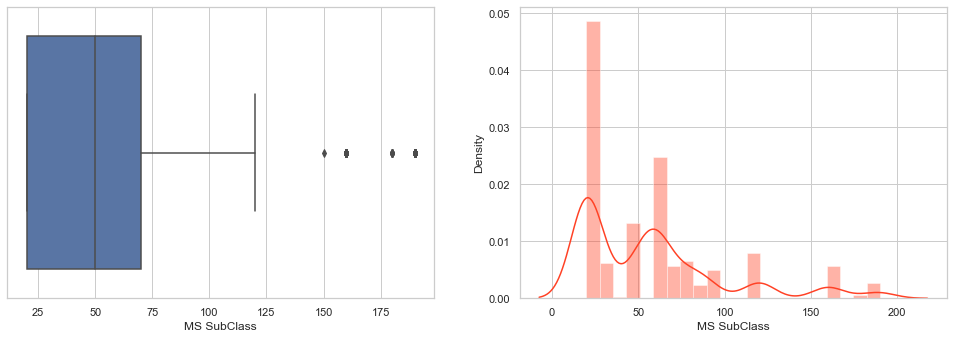

In [23]:
df = train
plot_numericals("MS SubClass")

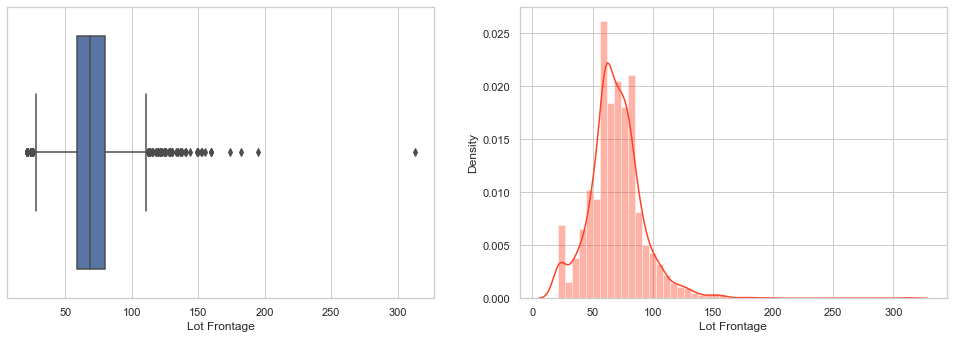

In [22]:
df = train
plot_numericals("Lot Frontage")

In [24]:
cor_mat= train[:].corr()
cor_with_target=cor_mat.sort_values(['SalePrice'],ascending=False)

print("The most relevant features (numeric) for the target are :")
cor_with_target.SalePrice

The most relevant features (numeric) for the target are :


SalePrice          1.000000
Overall Qual       0.798575
Gr Liv Area        0.713467
Garage Cars        0.656215
Garage Area        0.653389
Total Bsmt SF      0.643502
1st Flr SF         0.628449
Year Built         0.551826
Full Bath          0.535875
Mas Vnr Area       0.532213
Garage Yr Blt      0.522697
Year Remod/Add     0.517575
TotRms AbvGrd      0.508033
Fireplaces         0.473037
BsmtFin SF 1       0.433938
Lot Frontage       0.369796
Wood Deck SF       0.330118
Open Porch SF      0.319025
Half Bath          0.295514
Lot Area           0.270253
2nd Flr SF         0.265733
Bsmt Full Bath     0.262299
Bsmt Unf SF        0.193645
Bedroom AbvGr      0.138311
Screen Porch       0.127111
Pool Area          0.123529
Mo Sold            0.043067
3Ssn Porch         0.018996
Misc Val          -0.016983
BsmtFin SF 2      -0.018772
Low Qual Fin SF   -0.026177
Yr Sold           -0.026449
Bsmt Half Bath    -0.033208
Order             -0.035972
MS SubClass       -0.097442
Overall Cond      -0

<AxesSubplot:>

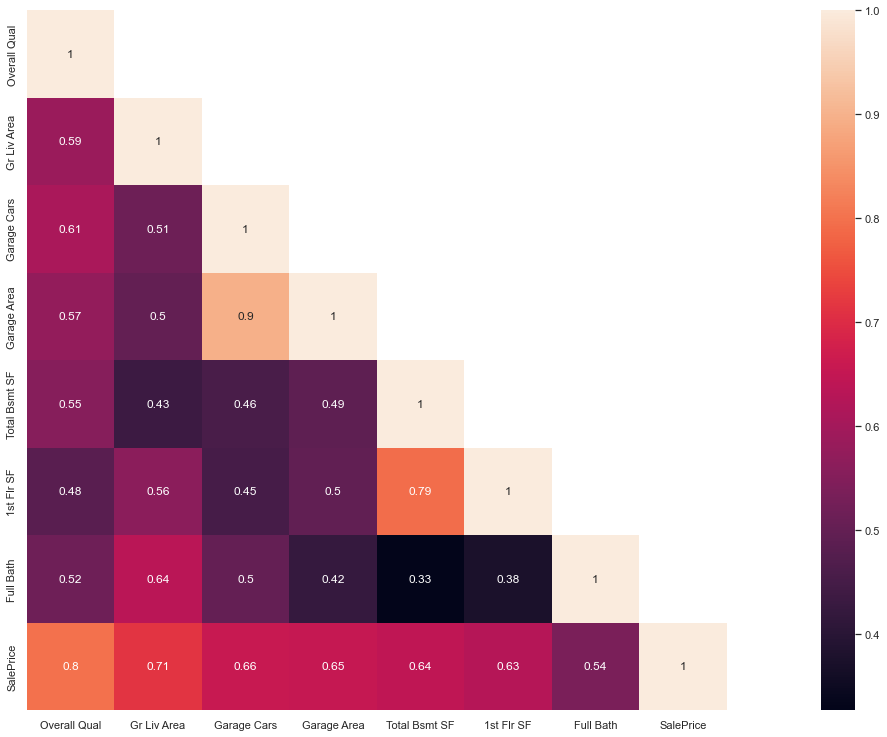

In [29]:
# Corelation map
cor_mat= train[['Overall Qual','Gr Liv Area','Garage Cars','Garage Area','Total Bsmt SF','1st Flr SF','Full Bath','SalePrice']].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [31]:
categoricals

['MS Zoning',
 'Street',
 'Alley',
 'Lot Shape',
 'Land Contour',
 'Utilities',
 'Lot Config',
 'Land Slope',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Mas Vnr Type',
 'Exter Qual',
 'Exter Cond',
 'Foundation',
 'Bsmt Qual',
 'Bsmt Cond',
 'Bsmt Exposure',
 'BsmtFin Type 1',
 'BsmtFin Type 2',
 'Heating',
 'Heating QC',
 'Central Air',
 'Electrical',
 'Kitchen Qual',
 'Functional',
 'Fireplace Qu',
 'Garage Type',
 'Garage Finish',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Pool QC',
 'Fence',
 'Misc Feature',
 'Sale Type',
 'Sale Condition']

In [30]:
def plot_categorical(feature):
  sns.countplot(data=df,x=feature)
  ax=sns.countplot(data=df,x=feature)

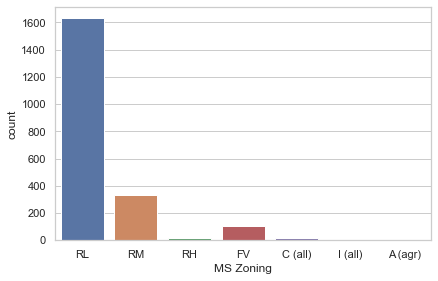

In [33]:
df = train
plot_categorical('MS Zoning')


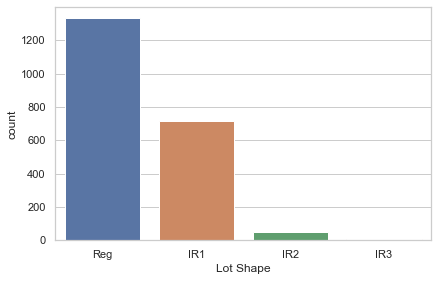

In [34]:
plot_categorical('Lot Shape')

In [37]:
train['Neighborhood'].value_counts()

NAmes      328
CollgCr    194
OldTown    179
Somerst    137
Edwards    130
NridgHt    119
Gilbert    116
Sawyer     109
NWAmes      92
Mitchel     84
SawyerW     83
Crawfor     74
BrkSide     72
IDOTRR      70
Timber      54
NoRidge     50
StoneBr     40
SWISU       34
ClearCr     34
MeadowV     26
Blmngtn     19
BrDale      18
Veenker     18
NPkVill     14
Blueste      9
Greens       4
Landmrk      1
GrnHill      1
Name: Neighborhood, dtype: int64

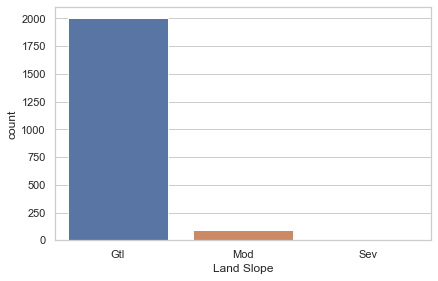

In [38]:
plot_categorical('Land Slope')

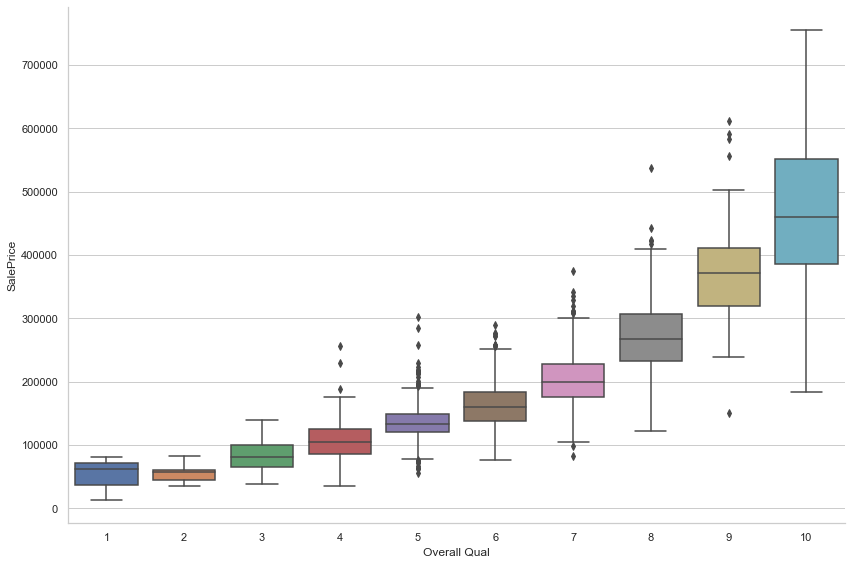

In [40]:
sns.factorplot(data=df,x='Overall Qual',y='SalePrice',kind='box',size=8,aspect=1.5)